In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

data = pd.read_csv('wine.csv')
X1 = data.iloc[:,0:11]
Y = data.iloc[:,11:12].values

iteration=10000

X1 = (X1 - X1.min())/(X1.max()-X1.min())
X1=X1.values
X = np.ones([X1.shape[0],1])
X = np.concatenate((X,X1),axis=1)

for i in range(1599):
    if Y[i,0]<7:
        Y[i,0]=0
    else:
        Y[i,0]=1

theta=np.zeros([12,1])

def hypo(X,theta):
    Z = np.dot(X, theta)
    W=1/(1+np.exp(-Z))
    return W

def costfunction(X,theta,Y):
    Z=hypo(X,theta)
    W=-(Y * np.log(Z)) - ((1 - Y) * np.log(1 - Z))
    cost= np.sum(W)/(X.shape[0])
    return cost

def grad_des(X,theta,iteration,Y):
        cost = np.zeros(iteration)
        for i in range (iteration):
            Z = hypo(X,theta)
            theta = theta -(0.5)*((X.T).dot((Z-Y)))/(X.shape[0])
            cost[i] = costfunction(X,theta,Y)
        return theta,cost

theta,cost=grad_des(X,theta,iteration,Y)

Z=hypo(X,theta)

result = (np.where(Z>=0.5,1,0))

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y,result,labels=[1,0])
print(cm)

accuracy_score(Y,result)

[[  72  145]
 [  42 1340]]


0.8830519074421513

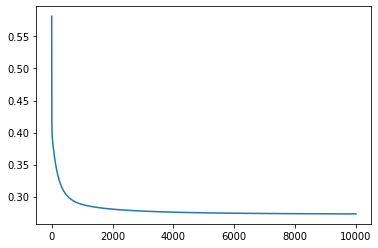

In [3]:
plt.plot(np.arange(iteration),cost)
plt.show()